# Home Credit Default Risk


## Exploratory Data Analysis

## 1. Introduction - Business Statement

A significant portion of the population, particularly those with insufficient or non-existent credit histories, struggle to obtain loans at Home Credit. This population is often vulnerable to untrustworthy lenders who may take advantage of them. Home Credit looks to address this problem by providing a positive and safe borrowing experience for the unbanked population. The goal for this project will be the reduction in loan rejections for creditworthy individuals, and the improvement in clients' loan repayment rates compared to previous methods by using the target variable of whether a client is likely to repay the loan or not.

## 2. Some of my questions before Analysis

- Is the data unbalanced with respect to the target? 
- What would the accuracy be for a simple model consisting in a majority class classifier?
- Do the values make sense?
- Are there columns with near-zero or zero variance?
- Is there enough data here to make an ML model?
- How many observations do we have?
- How many continuous and categorical variables there are?
- What is the data type of each variable?
- Do we have null values? What to do, remove rows?  Remove columns?  Impute?
- Are there duplicate values?
- What is the distribution of each variable?
- Do we have outliers?
- In the summary statistics table, are the max/min values reasonable for the variables? Do we see any values that look like errors?
- What is the mean for each variable? What do the means say about our dataset as a whole?
- What would be the best statistical method?

## 3. Data Overview

The Home Credit dataset is based on a real-world situation, provided by Home Credit. The dataset contains several tables with huge amount of data which has information about the loan applicant, credit scores of an applicant, their repayment history. The aim of this dataset is to create a predictive model that can accurately gauge the likelihood of loan default by the new applicants.

### Loading Packages

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

import os
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold

### (Description of the data) - shape, type of variables, #of columns, unique values, describe() table,

In [53]:

app_train_data= pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")

In [33]:
app_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Majority class classifier count

In [14]:
target_counts=app_train_data['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100

#pd.concat(target_Counts,target_percent)
target_counts

0    282686
1     24825
Name: TARGET, dtype: int64

Inmediatly we see a big majority of customer on the non default category. 

In [34]:
app_train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
# Number of rows and columns
app_train_data.shape

(307511, 122)

In [18]:
app_train_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [35]:
app_train_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

We can see there there are columns that do have null values. This will need to be cleaned.

### Distribution of Age

Text(0, 0.5, 'Count')

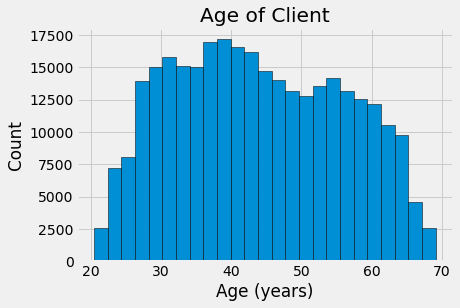

In [51]:
# Age distribution

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

We can see that age distribution is almost normal and most of the people are between 30 and 40 years

### Distribution of AMT_CREDIT

C:\Users\litzy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


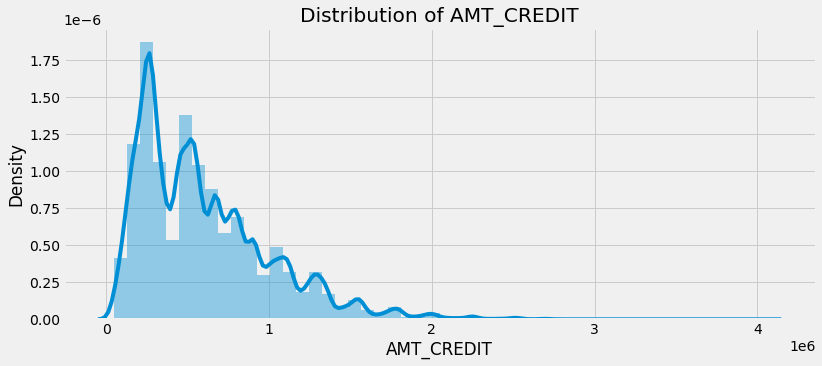

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train_data["AMT_CREDIT"])

### Data is balanced or imbalanced

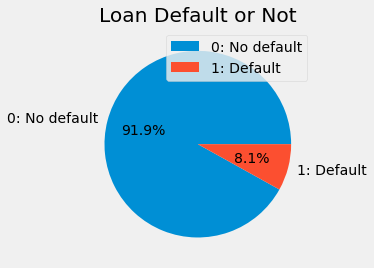

In [47]:
#plot target
default = ["0: No default", "1: Default"]
plt.pie(temp, labels =default, autopct='%1.1f%%')
plt.title("Loan Default or Not")
plt.legend()
plt.show()

As we can see above, the data is highly imbalanced. This is expected given Home Credit's business model. Defaults should be significantly fewer than non defaults.

In [48]:
pd.crosstab(app_train_data.NAME_TYPE_SUITE, app_train_data.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_TYPE_SUITE,,,,,,
Children,253,1940,318,378,0,378
Family,3702,28617,1747,4150,0,1933
Group of people,29,165,20,44,0,13
Other_A,147,340,70,268,0,41
Other_B,171,854,132,486,0,127
"Spouse, partner",1247,9685,74,345,0,19
Unaccompanied,24112,154047,17334,39529,0,13504


It is interesting to see that these two variables sometimes contradict each other. For example, separated, single or widowed applicants were sometimes accompanied by their partner. I suppose this means unofficial relationships? Also sometimes children accompanied the applicant. Maybe these were adult childred?

C:\Users\litzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of housing type')

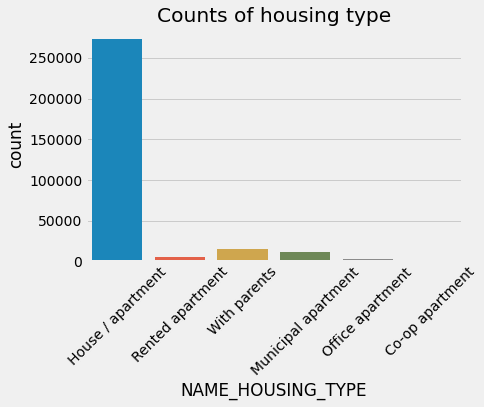

In [49]:
sns.countplot(app_train_data['NAME_HOUSING_TYPE']);
plt.xticks(rotation=45);
plt.title('Counts of housing type')

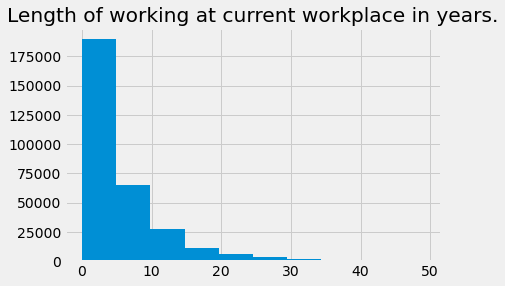

In [50]:
app_train_data.loc[app_train_data['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
app_train_data['years_employed'] = app_train_data['DAYS_EMPLOYED'] / -365
plt.hist(app_train_data['years_employed']);
plt.title('Length of working at current workplace in years.');

Ther was a strange value - 365243, it could mean empty values or some errors, so I replace it with zero. A lot of people don't work, but let's look deeper into this.

## 4. Merging data

In [52]:
app_train_data['AMT_INCOME_TOTAL'] = np.log1p(app_train_data['AMT_INCOME_TOTAL'])
app_train_data['AMT_CREDIT'] = np.log1p(app_train_data['AMT_CREDIT'])
app_train_data['OWN_CAR_AGE'] = app_train_data['OWN_CAR_AGE'].fillna(0)
app_train_data['app AMT_CREDIT / AMT_ANNUITY'] = app_train_data['AMT_CREDIT'] / app_train_data['AMT_ANNUITY']
app_train_data['app EXT_SOURCE mean'] = app_train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
app_train_data['app EXT_SOURCE_1 / DAYS_BIRTH'] = app_train_data['EXT_SOURCE_1'] / app_train_data['DAYS_BIRTH']
app_train_data['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = app_train_data['AMT_INCOME_TOTAL'] / 12. - app_train_data['AMT_ANNUITY']
app_train_data['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = app_train_data['AMT_INCOME_TOTAL'] / app_train_data['AMT_ANNUITY']
app_train_data['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = app_train_data['AMT_INCOME_TOTAL'] - app_train_data['AMT_GOODS_PRICE']

In [54]:
app_test.loc[app_test['OBS_30_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_30_CNT_SOCIAL_CIRCLE'] = '1+'
app_test.loc[app_test['DEF_30_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_30_CNT_SOCIAL_CIRCLE'] = '1+'
app_test.loc[app_test['OBS_60_CNT_SOCIAL_CIRCLE'] > 1, 'OBS_60_CNT_SOCIAL_CIRCLE'] = '1+'
app_test.loc[app_test['DEF_60_CNT_SOCIAL_CIRCLE'] > 1, 'DEF_60_CNT_SOCIAL_CIRCLE'] = '1+'
np.log1p(app_test['AMT_INCOME_TOTAL'])
np.log1p(app_test['AMT_CREDIT'])
app_test['age'] = app_test['DAYS_BIRTH'] / -365
app_test.loc[app_test['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
app_test['years_employed'] = app_test['DAYS_EMPLOYED'] / -365
app_test['AMT_INCOME_TOTAL'] = np.log1p(app_test['AMT_INCOME_TOTAL'])
app_test['AMT_CREDIT'] = np.log1p(app_test['AMT_CREDIT'])
app_test['OWN_CAR_AGE'] = app_test['OWN_CAR_AGE'].fillna(0)
app_test['app AMT_CREDIT / AMT_ANNUITY'] = app_test['AMT_CREDIT'] / app_test['AMT_ANNUITY']
app_test['app EXT_SOURCE mean'] = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
app_test['app EXT_SOURCE_1 / DAYS_BIRTH'] = app_test['EXT_SOURCE_1'] / app_test['DAYS_BIRTH']
app_test['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = app_test['AMT_INCOME_TOTAL'] / 12. - app_test['AMT_ANNUITY']
app_test['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = app_test['AMT_INCOME_TOTAL'] / app_test['AMT_ANNUITY']
app_test['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = app_test['AMT_INCOME_TOTAL'] - app_test['AMT_GOODS_PRICE']

In [60]:
le = LabelEncoder()
for col in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
           'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']:
    unique_values = list(set(list(app_train_data[col].astype(str).unique()) + list(app_test[col].astype(str).unique())))
    le.fit(unique_values)
    app_train_data[col] = le.transform(app_train_data[col].astype(str))
    app_test[col] = le.transform(app_test[col].astype(str))

In [61]:
train = app_train_data

In [62]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
test = app_test

In [64]:
train = train.fillna(0)
test = test.fillna(0)

In [66]:
X = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train['TARGET']
X_test = test.drop(['SK_ID_CURR'], axis=1)

## 5. Simple modelling, LGB

### Training the model

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
params = {
    'boosting': 'dart',
    'application': 'binary',
    'learning_rate': 0.01,
    'num_leaves': 34,
    'max_depth': 5,
    'feature_fraction': 0.9,
    'scale_pos_weight': 2,
    'reg_alpha': 0.05,
    'reg_lambda': 0.1}

model = lgb.train(params, lgb.Dataset(X_train, y_train), 40, [lgb.Dataset(X_train, y_train), lgb.Dataset(X_valid, y_valid)], verbose_eval=10, early_stopping_rounds=20)

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.138776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11250
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
[10]	valid_0's binary_logloss: 0.275254	valid_1's binary_logloss: 0.274576
[20]	valid_0's binary_logloss: 0.271695	valid_1's binary_logloss: 0.271182
[30]	valid_0's binary_logloss: 0.269634	valid_1's binary_logloss: 0.269209
[40]	valid_0's binary_logloss: 0.268569	valid_1's binary_logloss: 0.268224
[50]	valid_0's binary_logloss: 0.277451	valid_1's binary_logloss: 0.277217
[60]	valid_0's binary_logloss: 0.295126	valid_1's binary_logloss: 0.295004
[70]	valid_0's binary_logloss: 0.316678	valid_1's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[870]	valid_0's binary_logloss: 0.294997	valid_1's binary_logloss: 0.296458
[880]	valid_0's binary_logloss: 0.296264	valid_1's binary_logloss: 0.297739
[890]	valid_0's binary_logloss: 0.29473	valid_1's binary_logloss: 0.296235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's binary_logloss: 0.294943	valid_1's binary_logloss: 0.296469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[910]	valid_0's binary_logloss: 0.294849	valid_1's binary_logloss: 0.296388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[920]	valid_0's binary_logloss: 0.295176	valid_1's binary_logloss: 0.296715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

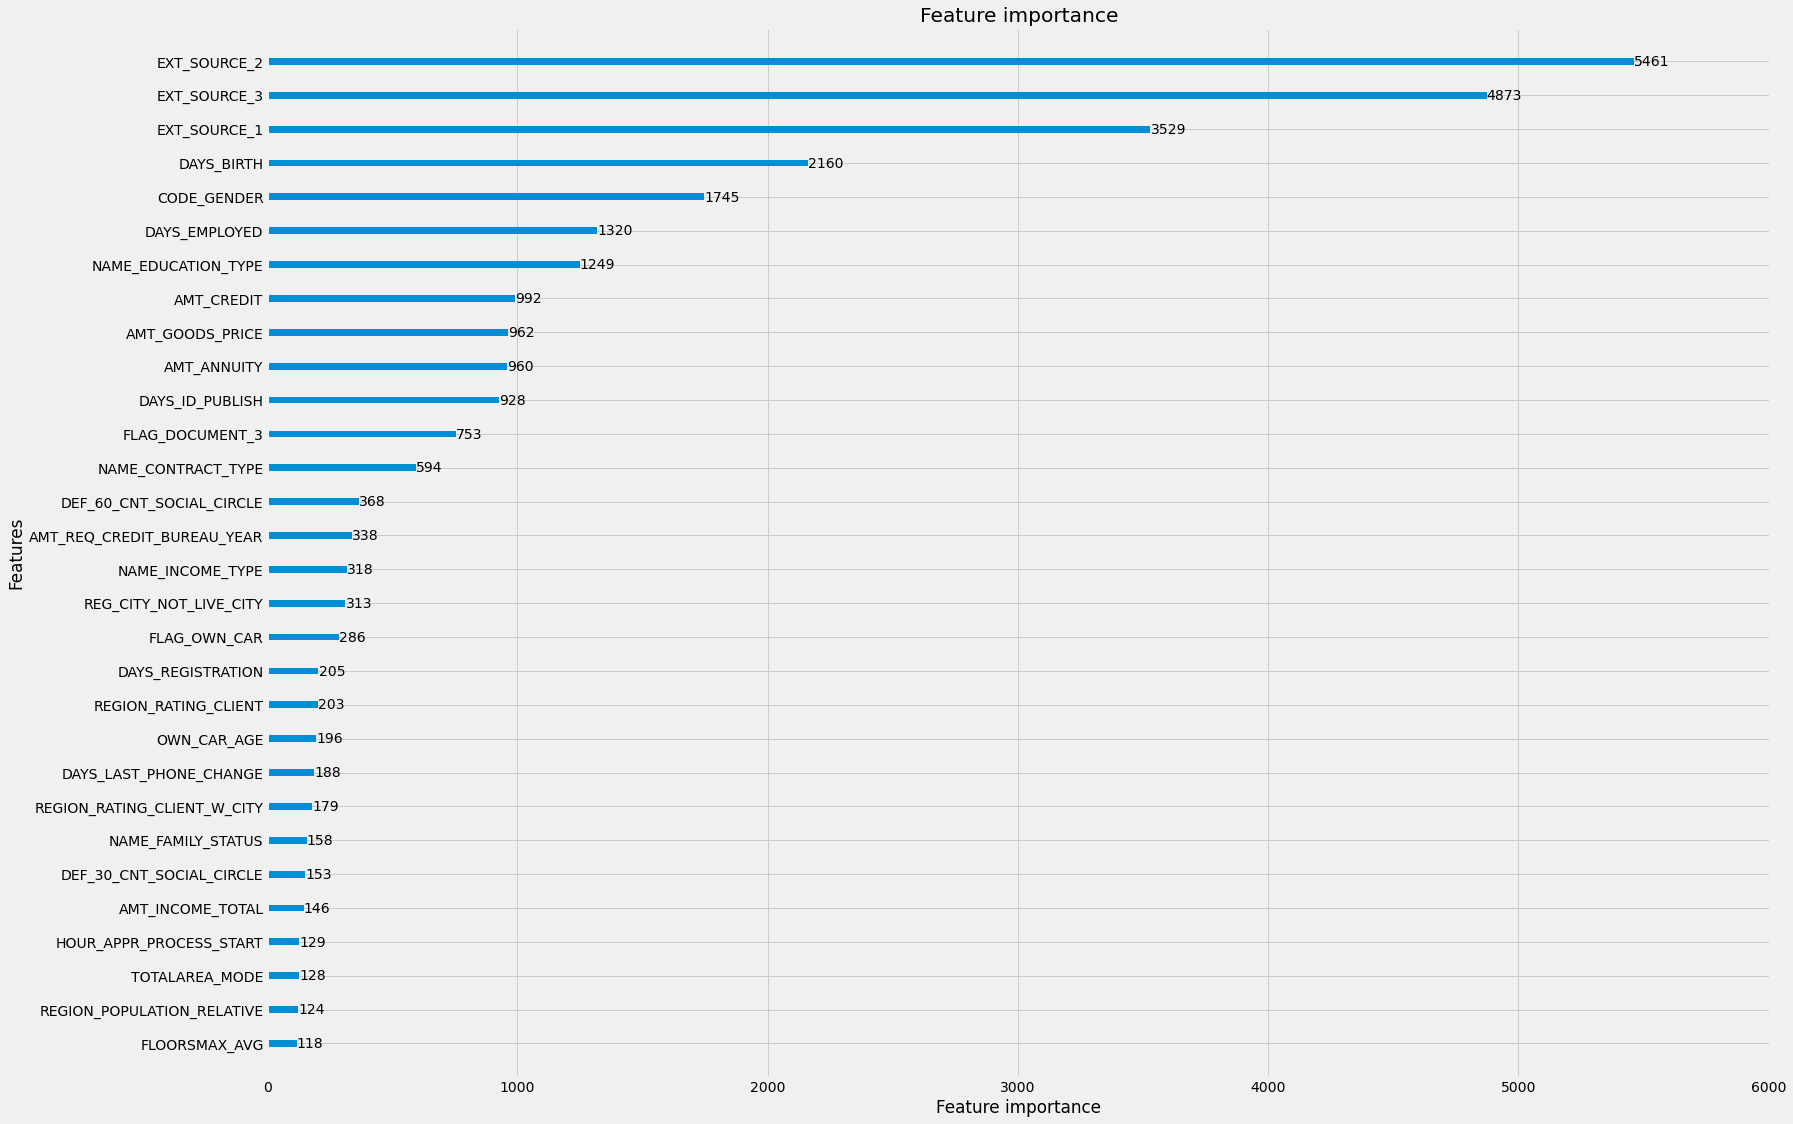

In [75]:
lgb.plot_importance(model, max_num_features=30, figsize=(24, 18))

After training the model we see the most important features are EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1, DAYS_BIRTH, GENDER. This is just to give an idea not including a lot of feature engineering. That will be the next approach for the next notebooks. The goal is to keep improving the model.

In [76]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
params={'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'num_leaves': 34,
 'subsample': 0.97,
 'max_depth': 8,
 'reg_alpha': 0.03,
 'reg_lambda': 0.07,
 'min_split_gain': 0.01,
 #'min_child_weight': 38
       }
prediction = np.zeros(X_test.shape[0])
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
        train_x, train_y = X.iloc[train_idx], y.iloc[train_idx]
        valid_x, valid_y = X.iloc[valid_idx], y.iloc[valid_idx]
        clf = lgb.LGBMClassifier(**params)
        clf.fit(train_x, train_y, 
                eval_set = [(train_x, train_y), (valid_x, valid_y)], eval_metric = 'auc', 
                verbose = 100, early_stopping_rounds = 50)
        prediction += clf.predict(X_test)

C:\Users\litzy\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\litzy\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.744115	training's binary_logloss: 0.257235	valid_1's auc: 0.733031	valid_1's binary_logloss: 0.25854


ValueError: Number of features of the model must match the input. Model n_features_ is 120 and input n_features is 128

I know that feature engineering and modelling could be much better, but decided to make EDA the main focus of this kernel. I'll do better feature engineering and modelling in the next one.